In [37]:
import pandas as pd

# Lee el archivo como un DataFrame
df_ventas = pd.read_csv('/Users/micaelabassan/Desktop/fundamentos/Labo 3/sell-in.txt', delimiter='\t',  decimal='.')  # Cambia el delimitador si es necesario
df_predict = pd.read_csv('/Users/micaelabassan/Desktop/fundamentos/Labo 3/productos_a_predecir.txt', delimiter='\t')  # Cambia el delimitador si es necesario
df_product = pd.read_csv('/Users/micaelabassan/Desktop/fundamentos/Labo 3/tb_productoscorregida.txt', delimiter='\t')  # Cambia el delimitador si es necesario
df_stocks = pd.read_csv('/Users/micaelabassan/Desktop/fundamentos/Labo 3/tb_stocks.txt', delimiter='\t')  # Cambia el delimitador si es necesario


In [38]:
print(df_ventas.head())
print(df_stocks.head())
print(df_product.head())

   periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0   201701        10234       20524                      0                 2   
1   201701        10032       20524                      0                 1   
2   201701        10217       20524                      0                 1   
3   201701        10125       20524                      0                 1   
4   201701        10012       20524                      0                11   

   cust_request_tn     tn  
0            0.053  0.053  
1            0.136  0.136  
2            0.030  0.030  
3            0.023  0.023  
4            1.545  1.545  
   periodo  product_id  stock_final
0   201810       20524        1.613
1   201810       20311        2.937
2   201810       20654        6.833
3   201810       21005        1.013
4   201810       20974        0.346
  cat1         cat2     cat3    brand  sku_size  product_id
0   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20280
1   HC  ROPA LA

In [39]:
df_ventas.info()
df_stocks.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945818 entries, 0 to 2945817
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                int64  
 1   customer_id            int64  
 2   product_id             int64  
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
dtypes: float64(2), int64(5)
memory usage: 157.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13691 entries, 0 to 13690
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   periodo      13691 non-null  int64  
 1   product_id   13691 non-null  int64  
 2   stock_final  13691 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 321.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dty

In [40]:
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 2.0.3


In [8]:
! pip install sweetviz
import sweetviz

     |████████████████████████████████| 15.1 MB 9.8 MB/s eta 0:00:01


In [10]:
my_report  = sweetviz.analyze(df_product)

                                             |          | [  0%]   00:00 -> (? left)

In [11]:
my_report.show_html()
my_report.show_html('Product.html')

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report Product.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


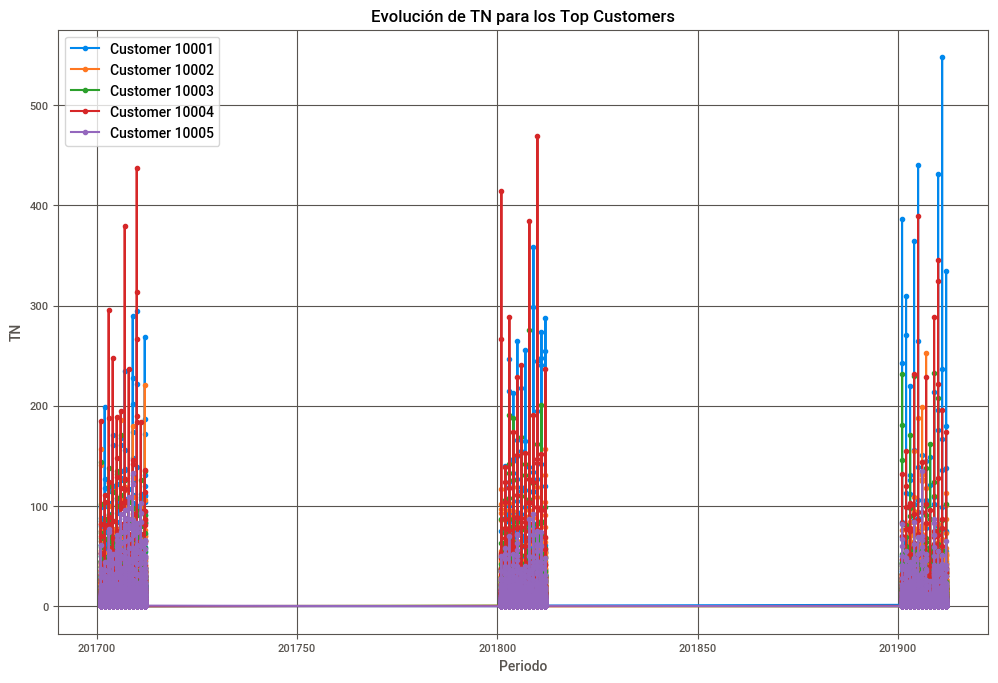

In [21]:
import matplotlib.pyplot as plt
# Calcular el volumen total de tn por customer_id
volume_by_customer = df_ventas.groupby('customer_id')['tn'].sum()

# Seleccionar los customer_id con mayor volumen de tn (por ejemplo, los top 5)
top_customers = volume_by_customer.nlargest(5).index

# Filtrar el DataFrame para incluir solo los top customers
df_top_customers = df_ventas[df_ventas['customer_id'].isin(top_customers)]

# Ordenar el DataFrame filtrado por customer_id y periodo
df_top_customers = df_top_customers.sort_values(by=['customer_id', 'periodo'])

# Graficar la evolución de tn por customer_id para los top customers
plt.figure(figsize=(12, 8))
for customer_id in df_top_customers['customer_id'].unique():
    customer_data = df_top_customers[df_top_customers['customer_id'] == customer_id]
    plt.plot(customer_data['periodo'].values, customer_data['tn'].values, marker='o', label=f'Customer {customer_id}')

plt.xlabel('Periodo')
plt.ylabel('TN')
plt.title('Evolución de TN para los Top Customers')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# Ver los valores únicos de la columna 'periodo'
valores_periodo = df_ventas['periodo'].unique()
print(valores_periodo)


[201701 201702 201703 201704 201705 201706 201707 201708 201709 201710
 201711 201712 201801 201802 201803 201804 201805 201806 201807 201808
 201809 201810 201811 201812 201901 201902 201903 201904 201905 201906
 201907 201908 201909 201910 201911 201912]


periodo                   object
customer_id                int64
product_id                 int64
plan_precios_cuidados      int64
cust_request_qty           int64
cust_request_tn          float64
tn                       float64
dtype: object


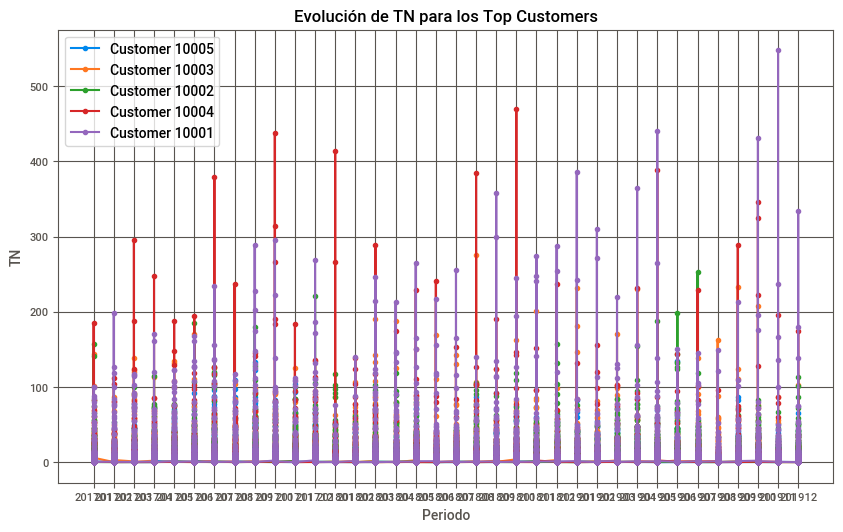

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_ventas ya está definido


# Verifica los tipos de datos nuevamente
print(df_ventas.dtypes)

# Encuentra los top 5 customers por volumen de ventas
top_customers = df_ventas.groupby('customer_id')['tn'].sum().nlargest(5).index

# Filtra los datos para solo incluir los top customers
df_top_customers = df_ventas[df_ventas['customer_id'].isin(top_customers)]

# Gráfico
plt.figure(figsize=(10, 6))
for customer_id in df_top_customers['customer_id'].unique():
    customer_data = df_top_customers[df_top_customers['customer_id'] == customer_id]
    plt.plot(customer_data['periodo'].values, customer_data['tn'].values, marker='o', label=f'Customer {customer_id}')


plt.xlabel('Periodo')
plt.ylabel('TN')
plt.title('Evolución de TN para los Top Customers')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import pandas as pd

# Supongamos que 'df_ventas' es tu DataFrame y 'periodo' es el nombre de la columna que contiene las fechas en formato '%Y-%m-%d'

# Muestra los primeros valores de la columna 'periodo' antes de la conversión
print("Antes de la conversión:")
print(df_ventas['periodo'].head())

# Convierte la columna 'periodo' a formato datetime
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'])

# Formatea la columna 'periodo' en el nuevo formato '%Y%m'
df_ventas['periodo'] = df_ventas['periodo'].dt.strftime('%Y%m')

# Muestra los primeros valores de la columna 'periodo' después de la conversión
print("\nDespués de la conversión:")
print(df_ventas['periodo'].head())


Antes de la conversión:
0    2017-01-01
1    2017-01-01
2    2017-01-01
3    2017-01-01
4    2017-01-01
Name: periodo, dtype: object

Después de la conversión:
0    201701
1    201701
2    201701
3    201701
4    201701
Name: periodo, dtype: object


periodo                   object
customer_id                int64
product_id                 int64
plan_precios_cuidados      int64
cust_request_qty           int64
cust_request_tn          float64
tn                       float64
dtype: object


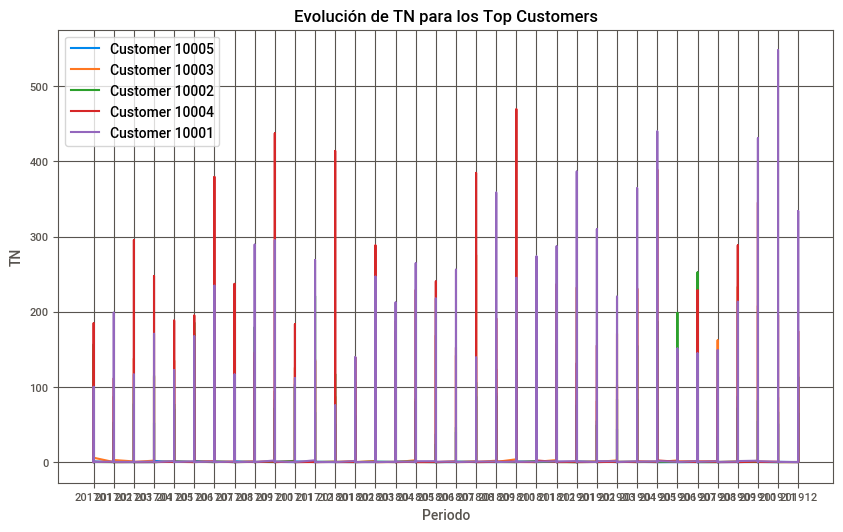

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_ventas ya está definido
# Verifica los tipos de datos nuevamente
print(df_ventas.dtypes)

# Encuentra los top 5 customers por volumen de ventas
top_customers = df_ventas.groupby('customer_id')['tn'].sum().nlargest(5).index

# Filtra los datos para solo incluir los top customers
df_top_customers = df_ventas[df_ventas['customer_id'].isin(top_customers)]

# Gráfico
plt.figure(figsize=(10, 6))
for customer_id in df_top_customers['customer_id'].unique():
    customer_data = df_top_customers[df_top_customers['customer_id'] == customer_id]
    plt.plot(customer_data['periodo'].values, customer_data['tn'].values, label=f'Customer {customer_id}', linestyle='-')

plt.xlabel('Periodo')
plt.ylabel('TN')
plt.title('Evolución de TN para los Top Customers')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
print(df_ventas.head())


# Muestra 5 valores aleatorios de la columna
print(df_ventas['periodo'].sample(5))

  periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0  201701        10234       20524                      0                 2   
1  201701        10032       20524                      0                 1   
2  201701        10217       20524                      0                 1   
3  201701        10125       20524                      0                 1   
4  201701        10012       20524                      0                11   

   cust_request_tn     tn  
0            0.053  0.053  
1            0.136  0.136  
2            0.030  0.030  
3            0.023  0.023  
4            1.545  1.545  
1015915    201712
1253558    201803
643201     201708
1941728    201811
2600774    201908
Name: periodo, dtype: object


In [54]:
# Asegúrate de que 'periodo' sea un string
df_ventas['periodo'] = df_ventas['periodo'].astype(str)

# Verifica algunos valores de 'periodo'
print(df_ventas['periodo'].head())

0    201701
1    201701
2    201701
3    201701
4    201701
Name: periodo, dtype: object


In [35]:
# Asegúrate de que 'periodo' sea un string
df_stocks['periodo'] = df_stocks['periodo'].astype(str)

# Verifica algunos valores de 'periodo'
print(df_stocks['periodo'].head())

# Convierte 'periodo' a un tipo datetime
df_stocks['periodo'] = pd.to_datetime(df_stocks['periodo'], format='%Y%m')

# Verifica los tipos de datos nuevamente
print(df_stocks.dtypes)

0    201810
1    201810
2    201810
3    201810
4    201810
Name: periodo, dtype: object
periodo        datetime64[ns]
product_id              int64
stock_final           float64
dtype: object


In [55]:
# Contar los valores únicos de 'product_id' en df_ventas
ventas_unique_product_ids = df_ventas['product_id'].nunique()

# Contar los valores únicos de 'product_id' en df_product
product_unique_product_ids = df_product['product_id'].nunique()

print("Número de valores únicos de 'product_id' en df_ventas:", ventas_unique_product_ids)
print("Número de valores únicos de 'product_id' en df_product:", product_unique_product_ids)


Número de valores únicos de 'product_id' en df_ventas: 1233
Número de valores únicos de 'product_id' en df_product: 1251


In [56]:
# Obtener los valores únicos de 'product_id' en df_ventas y df_product
ventas_unique_product_ids = set(df_ventas['product_id'].unique())
product_unique_product_ids = set(df_product['product_id'].unique())

# Calcular la intersección de los conjuntos
common_product_ids = ventas_unique_product_ids.intersection(product_unique_product_ids)

# Obtener la cantidad de valores comunes
num_common_product_ids = len(common_product_ids)

print("Número de valores de 'product_id' comunes entre df_ventas y df_product:", num_common_product_ids)


Número de valores de 'product_id' comunes entre df_ventas y df_product: 1188


In [65]:
# Obtener los valores únicos de 'product_id' en df_ventas y df_product
ventas_unique_product_ids = set(df_ventas['product_id'].unique())
product_unique_product_ids = set(df_predict['product_id'].unique())

# Calcular la intersección de los conjuntos
common_product_ids = ventas_unique_product_ids.intersection(product_unique_product_ids)

# Obtener la cantidad de valores comunes
num_common_product_ids = len(common_product_ids)

print("Número de valores de 'product_id' comunes entre df_ventas y df_predict:", num_common_product_ids)

Número de valores de 'product_id' comunes entre df_ventas y df_predict: 780


In [68]:
# Obtener los valores únicos de 'product_id' en df_ventas y df_product
ventas_unique_product_ids = set(df_product['product_id'].unique())
product_unique_product_ids = set(df_predict['product_id'].unique())

# Calcular la intersección de los conjuntos
common_product_ids = ventas_unique_product_ids.intersection(product_unique_product_ids)

# Obtener la cantidad de valores comunes
num_common_product_ids = len(common_product_ids)

print("Número de valores de 'product_id' comunes entre df_product y df_predict:", num_common_product_ids)

Número de valores de 'product_id' comunes entre df_product y df_predict: 780


In [63]:
# Convertir 'periodo' a un formato de fecha y hora
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'], format='%Y%m')

# Extraer el año de la columna 'fecha'
df_ventas['year'] = df_ventas['periodo'].dt.year

# Agrupar por año y por ID de producto, y sumar las ventas
ventas_por_anio_producto = df_ventas.groupby(['year', 'product_id'])['tn'].sum().reset_index()

# Obtener los índices de los máximos de ventas por año
indices_max_ventas_por_anio = ventas_por_anio_producto.groupby('year')['tn'].idxmax()

# Filtrar el DataFrame original con los índices obtenidos
productos_mas_vendidos_por_anio = ventas_por_anio_producto.loc[indices_max_ventas_por_anio]

print(productos_mas_vendidos_por_anio)


      year  product_id         tn
0     2017       20001  14813.007
931   2018       20001  18070.596
1907  2019       20001  17456.793


In [62]:
# Convertir 'periodo' a un formato de fecha y hora
df_ventas['periodo'] = pd.to_datetime(df_ventas['periodo'], format='%Y%m')

# Extraer el año de la columna 'fecha'
df_ventas['year'] = df_ventas['periodo'].dt.year

# Agrupar por año y por ID de producto, y sumar las ventas
ventas_por_anio_producto = df_ventas.groupby(['year', 'product_id'])['tn'].sum().reset_index()

# Obtener los top 5 de ventas por año
top_ventas_por_anio = ventas_por_anio_producto.groupby('year').apply(lambda x: x.nlargest(5, 'tn')).reset_index(drop=True)

print(top_ventas_por_anio)


    year  product_id         tn
0   2017       20001  14813.007
1   2017       20003  12084.811
2   2017       20007   9236.680
3   2017       20002   9183.638
4   2017       20004   8806.450
5   2018       20001  18070.596
6   2018       20002  13048.371
7   2018       20003  10499.625
8   2018       20004   7845.120
9   2018       20007   7572.118
10  2019       20001  17456.793
11  2019       20002  14105.246
12  2019       20003   9419.717
13  2019       20005   8019.241
14  2019       20004   7526.584


In [64]:
print(df_predict.head())

   product_id
0       20001
1       20002
2       20003
3       20004
4       20005


In [67]:
# Unir los DataFrames en función de la columna 'product_id'
df_ventas2 = pd.merge(df_ventas, df_predict, on='product_id', how='inner')

# Verificar la cantidad de product_id distintos
cantidad_product_id_distintos = df_ventas2['product_id'].nunique()

print("Cantidad de product_id distintos en el DataFrame unido:", cantidad_product_id_distintos)

# Guardar el nuevo DataFrame en un archivo si es necesario
df_ventas2.to_csv('ventas2_dataset.csv', index=False)

Cantidad de product_id distintos en el DataFrame unido: 780


In [78]:

# Verificar la cantidad de product_id distintos
cantidad_product_id_distintos = df_vtas['product_id'].nunique()
# Eliminar duplicados en df_products para evitar que se dupliquen filas durante la fusión
df_product_unique = df_product.drop_duplicates(subset='product_id')

# Unir los DataFrames en función de la columna 'product_id'
df_vtas = pd.merge(df_ventas2, df_product_unique, on='product_id', how='left')

# Verificar que la dimensión de filas de df_ventas2 no cambie
dimension_filas_ventas2 = df_ventas2.shape[0]
dimension_filas_merged = df_vtas.shape[0]

print("Cantidad de product_id distintos en el DataFrame unido:", cantidad_product_id_distintos)
print("Dimensión de filas de df_ventas2 antes de la unión:", dimension_filas_ventas2)
print("Dimensión de filas del DataFrame unido:", dimension_filas_merged)

# Guardar el nuevo DataFrame en un archivo si es necesario
df_ventas2.to_csv('merged_dataset.csv', index=False)

Cantidad de product_id distintos en el DataFrame unido: 780
Dimensión de filas de df_ventas2 antes de la unión: 2293481
Dimensión de filas del DataFrame unido: 2293481


In [77]:
# Creamos un DataFrame con todas las combinaciones posibles de customer_id, periodo y product_id
combinations = pd.MultiIndex.from_product([df_vtas['customer_id'].unique(), df_vtas['periodo'].unique(), df_vtas['product_id'].unique()], names=['customer_id', 'periodo', 'product_id'])
empty_df = pd.DataFrame(index=combinations).reset_index()

# Fusionamos el DataFrame vacío con df_merged para llenar los valores faltantes
df_final = pd.merge(empty_df, df_vtas, on=['customer_id', 'periodo', 'product_id'], how='left')

# Rellenamos los valores NaN de la columna 'tn' con 0
df_final['tn'].fillna(0, inplace=True)

# Sumamos la columna 'tn' por cliente, periodo y product_id
df_sum_tn = df_final.groupby(['customer_id', 'periodo', 'product_id'])['tn'].sum().reset_index()

print(df_sum_tn).head()


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



AttributeError: 'NoneType' object has no attribute 'head'

IOStream.flush timed out


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Filtrar el DataFrame para obtener datos hasta el mes 201912
df_train = df_final[df_final['periodo'] < '202001']

# Dividir los datos en características (X) y variable objetivo (y)
X_train = df_train.drop(['tn', 'periodo'], axis=1)  # Excluir la columna 'tn' y 'periodo' de las características
y_train = df_train['tn']

# Inicializar y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones para el mes 202001 (mes siguiente al último mes en los datos)
X_test = df_final[df_final['periodo'] == '202001'].drop(['tn', 'periodo'], axis=1)
predictions = rf_model.predict(X_test)

# Calcular el error cuadrático medio de las predicciones (simulado)
# Dado que no tenemos los valores reales, podemos calcular el MSE en el conjunto de entrenamiento
train_predictions = rf_model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
print("Error cuadrático medio en las predicciones simuladas:", mse)
